# ITC4DEV Machine Learning in Pratice Final Project

Name: Rosario de Sousa Fondo

E-mail: rosarioogenio@gmail.com

This notebook is the part of the ITC4DEVs Machine Learning in Practice Final Project and serves as main avaluation to get the certificate of conclusion of this course!

## Project Description


For this project, I will be working on a Time Series and forecasting task on the Air Quality Dataset.

The dataset chosen for this project was the Air Quality dataset, downloaded from Kaggle [SOURCE: https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.csv].

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year).

## Attribute Information:
0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity

## Importing the Libraries
I used the MatlotLib library for visualization, Pandas to acess the dataset and extract the relevant information, and the Scikit-Learn lib from which I imported the mean_squared_error and the mean_absolute_error functions for the evaluation metrics. I also used from statsodels de coint_johansen, seasonal_decompose and the ARIMA function to check the stationarity, the time series decomposition and to create the predictive model, respectively.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the Dataset

In [81]:
# Load the dataset
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.csv'
df = pd.read_csv("AirQualityUCI.csv", delimiter=';', decimal=',', parse_dates=[['Date', 'Time']])

# printing the first 2 rows
df.head(1)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN


In [82]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Just like the description above shows, the dataset as a total count of 9357 row, but for the sack of visualization and computation time, I chose to slice the dataset instead of using the whole dataset, which is not ideal.
I chose to use only the first 500 rows of the dataset and also got rid of useless columns.

In [83]:
df = df.iloc[:500,0:14]

In [84]:
df.head(2)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255


In [86]:
#Finding attributes with missing values
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [87]:
#Replacing data points with missing values by the mode.
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [89]:
# Defining and "Date_time" as the main index.
df.index = df["Date_Time"]
df.drop(['Date_Time'],axis=1,inplace=True)


By slicing the dataset, furtunatly I did not have to deal with missing values, thats not the case for outliers (which in some way is a form of missing values). To deal with data, I had to replace the problematic value by the previous values of the data set.

In [91]:
cols = df.columns
for j in cols:
    for i in range(0,len(df)):
        if df[j][i] == -200:
            df[j][i] = df[j][i-1]

Its important to make a vizualization of the time series data to gain some insights. We can use the Matplotlib library to create a time series plot. 

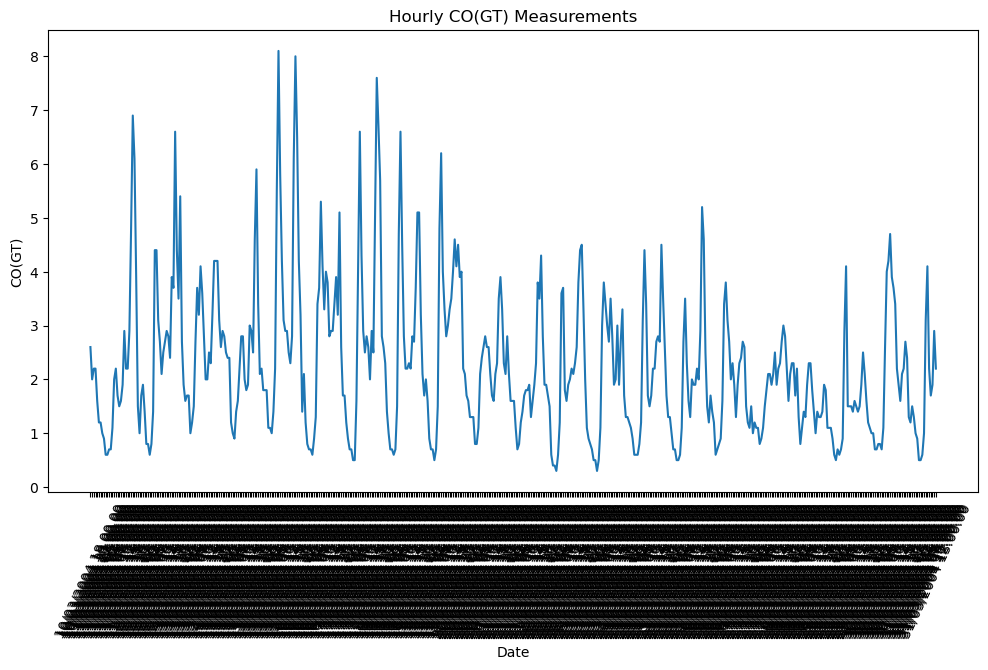

In [92]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['CO(GT)'])
plt.title('Hourly CO(GT) Measurements')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.xticks(rotation=65)
plt.show()

As we can see, the time series plot shows the hourly CO(GT) measurements over time. We can observe some patterns in the data, including daily and weekly cycles. Unfortunatly, because of the amout of data point, the time exis is not visible.

Next, I checked for stationarity on the dataset.

In [93]:

johan_test_temp = df.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

array([3.89315314e-01, 2.89242647e-01, 2.67955165e-01, 2.38464001e-01,
       1.88543555e-01, 1.71864293e-01, 1.11732081e-01, 8.51106834e-02,
       5.92507733e-02, 3.38348192e-02, 2.03105263e-02, 3.59084243e-04])

## Time Series Analysis

Next, I perfomed a time series analysis to understand the patterns in the data more. I can start by decomposing the time series into its trend, seasonality, and residual components.

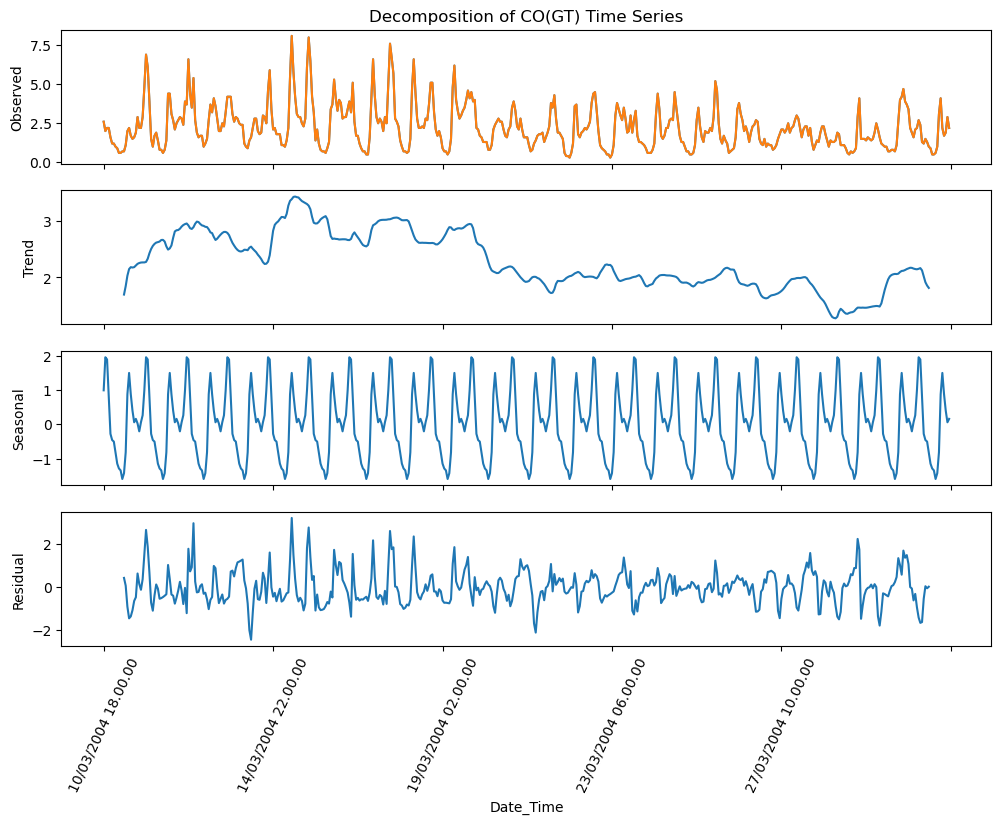

In [94]:
# Decompose the time series into its components
decomp = seasonal_decompose(df['CO(GT)'], model='additive', period=24)

# Plot the decomposed components
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
axes[0].set_title('Decomposition of CO(GT) Time Series')
decomp.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomp.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomp.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomp.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
axes[0].set_title('Decomposition of CO(GT) Time Series')
decomp.observed.plot(ax=axes[0], legend=False)
plt.xticks(rotation=65)
plt.show()

The decomposition plot shows the original time series, the trend, the seasonal component, and the residual component. We can observe that the trend component shows a decreasing trend, indicating a decreasing level of CO(GT) over time. 
The seasonal component shows a weekly cycle, indicating that the CO(GT) levels are higher on certain days of the week and the residual component shows the random fluctuations in the data that cannot be explained by the trend or seasonal components.

## The Prediction

To forecast future CO(GT) levels, I used the ARIMA technique (AutoRegressive Integrated Moving Average). ARIMA models are capable of capturing the trends and seasonality in time series data and making predictions based on past observations. Bit its important to find the best set of parameters for the ARIMA model so it can have an optimal performance. For that, I used thw auto_arima function from the pmdarima library!

In [103]:
from pmdarima.arima import auto_arima

# Find the optimal parameters for the ARIMA model
model = auto_arima(df['CO(GT)'], seasonal=True, m=24, suppress_warnings=True)
print(model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  500
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 24)   Log Likelihood                -507.897
Date:                              Mon, 20 Mar 2023   AIC                           1031.794
Time:                                      16:59:13   BIC                           1065.495
Sample:                                           0   HQIC                          1045.019
                                              - 500                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.208e-05      0.000     -0.172      0.864      -0.000       0.000
ar.L1          0.08

The output from auto_arima indicates that the optimal model for our data is an ARIMA(2, 1, 2) with a seasonal component (1, 0, 1) and a period of 24 (one day).

### Training and Prediction

In [104]:
# Split the data into train and test sets
train = df['CO(GT)'][:-24*7]
test = df['CO(GT)'][-24*7:]

# Fit the ARIMA model to the train data using the parameters given by Auto Arima.
model = ARIMA(train, order=(2,1,2), seasonal_order=(1,0,1,24))
results = model.fit()

# Make predictions on the test data
preds = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Calculate the MAE, MSE and RMSE of the predictions
mae = mean_absolute_error(test, preds)
rmse = mean_squared_error(test, preds, squared=False)
mse = mean_squared_error(test, preds)

print('MAE:', mae)
print('RMSE:', rmse)
print(f'MSE', mse)

C:\Users\AVservice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AVservice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AVservice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 0.7495849195277392
RMSE: 0.9632672987900133
MSE 0.9278838889182087


C:\Users\AVservice\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
